ChatGPT 3.5 for error finding and following PEP-8 Conventions

The use for each link is thoroughly mentioned in the Final Paper.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [1]:
# Data Cleaning/Pre-Processing
import pandas as pd
import numpy as np

# Load the data of disasters and temperatures
natural_disaster_data = pd.read_csv('natural disaters.csv', delimiter = ",")
weather_data = pd.read_csv('nrest_of_data.csv', delimiter=",")

# Merge the data based on the similar columns of year, month, date
merged_data = pd.merge(weather_data, natural_disaster_data, on=['YEAR', 'MONTH', 'DAY'], how='left', sort=False, copy=None)

# Fill in any empty columns with 'NO' for data cleaning
merged_data['YES/NO'].fillna('NO', inplace=True)

# Save the merged data to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)

https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/

In [2]:
# Loads the merged dataset
merged_data = pd.read_csv('merged_data.csv')

# Replace 'YES' with 1 and 'NO' with 0 in the 'YES/NO' column
# merged_data['YES/NO'] = merged_data['YES/NO'].replace({'YES': 1, 'NO': 0})

# Columns to replace missing values
columns_to_replace = ['PRECIPITATION', 'MAX TEMP', 'MIN TEMP', 'MEAN TEMP']

# Values to replace in the dataset downloaded (e.g., -99.99 or -99.9 if there was no value)
replace_values = {-99.9: np.nan, -99.99: np.nan}

# Replace missing values with the mean of each column, rounded to 2 decimal places
merged_data[columns_to_replace] = merged_data[columns_to_replace].replace(replace_values)
merged_data[columns_to_replace] = merged_data[columns_to_replace].fillna(merged_data[columns_to_replace].mean().round(2))

# Save the modified data to a new CSV file
merged_data.to_csv('modified_data.csv', index=False)

# Uncomment if you want to read the modified data and print the number of 1s in the 'YES/NO' column
# modified_data = pd.read_csv('modified_data.csv')
# num_ones = modified_data['YES/NO'].sum()
# print(f'Number of 1s in the YES/NO column: {num_ones}')

In [3]:
merged_data = pd.read_csv('modified_data.csv')

# The data of the cities is in order, this loops through and places it into the columns

florida_cities = [
    "Zolfo Springs", "St. Petersburg", "Melbourne", "Niceville", "Indialantic", "Carrabelle", "Hypoluxo", "Atlantic Beach", "Sopchoppy",
    "Fernandina Beach", "Edgewood", "Starke", "Bonita Springs", "Bristol", "Pierson", "Shalimar", "Deerfield Beach", "Destin", "Briny Breezes",
    "Pensacola", "Chipley", "Bronson", "Palm Bay", "Jupiter", "Miami Beach", "Beverly Beach", "Haverhill", "Zephyrhills", "Cottondale", "Aventura",
    "Belleair Shore", "DeFuniak Springs", "Gretna", "Davie", "Key Biscayne", "North Port", "Dundee", "North Bay Village", "Holmes Beach", "Sneads",
    "Oldsmar", "Madison", "Springfield", "Cross City", "Fort White", "Westlake", "Waldo", "Tequesta", "Graceville", "Keystone Heights", "Bradenton",
    "Mangonia Park", "Belleair Bluffs", "Palm Springs", "Safety Harbor", "St. Augustine", "Sunrise", "Marathon", "Jacksonville Beach", "Palmetto",
    "Weston", "Naples", "Ocean Ridge", "Miami Shores", "Highland Beach", "Mary Esther", "High Springs", "Crystal River", "Bunnell", "El Portal",
    "Cutler Bay", "Madeira Beach", "Surfside", "Port Orange", "Medley", "Wildwood", "Jupiter Island", "Cape Coral", "Lake Clarke Shores",
    "Loxahatchee Groves", "Lady Lake", "Indiantown", "North Miami", "Jay", "Greenville",     "Inverness", "Altha", "Inglis", "Orlando", "Polk City", "Lazy Lake", "Altamonte Springs", "Delray Beach", "West Park", "Lauderdale Lakes",
    "Live Oak", "Wilton Manors", "St. Cloud", "Daytona Beach", "Otter Creek", "Frostproof", "Sewall's Point", "Caryville", "Lighthouse Point",
    "Anna Maria", "Clewiston", "Cooper City", "North Palm Beach", "Mount Dora", "Interlachen", "Arcadia", "South Daytona", "Cloud Lake", "Alford",
    "Gulfport", "Montverde", "Hialeah", "Coleman", "Palmetto Bay", "West Melbourne", "Bay Lake", "Apopka", "Malabar", "Longwood", "Parkland",
    "Deltona", "Winter Haven", "Layton", "Vero Beach", "Newberry", "Pompano Beach", "Hilliard", "Seminole", "Dade City", "Wewahitchka",
    "Indian Harbour Beach", "Crescent City", "North Lauderdale", "Bay Harbor Islands", "Blountstown", "Port St. Lucie", "DeLand", "Esto",
    "Macclenny", "Fellsmere", "Melbourne Village", "Laurel Hill", "Miami Gardens", "West Miami", "St. Augustine Beach", "Orchid", "Pahokee",
    "Umatilla", "Cape Canaveral", "Greenwood", "Callahan", "Green Cove Springs", "White Springs", "Satellite Beach", "Lakeland", "Lake Placid",
    "Port St. Joe", "Milton", "Key West", "Holly Hill", "Groveland", "Winter Garden", "Ormond Beach", "Indian Rocks Beach", "Windermere",
    "Moore Haven", "Astatula", "Fruitland Park", "Fort Myers Beach", "South Bay", "Mexico Beach", "North Redington Beach", "St. Leo",
    "Redington Beach", "Port Richey", "Quincy", "Orange Park", "Coral Gables", "Miami Springs", "Alachua", "Oviedo", "Clearwater", "Indian Creek",
    "Panama City", "Jennings", "Brooker", "Fort Myers", "Sanibel", "Campbellton", "Fanning Springs", "Midway", "Temple Terrace", "Cedar Key",
    "Ponce de Leon", "Punta Gorda", "Parker", "Tallahassee", "Rockledge", "Paxton", "Hawthorne", "Greenacres", "Palm Beach Gardens", "Islamorada",
    "St. Marks", "Tavares", "New Port Richey", "Everglades City", "Jacksonville", "South Pasadena", "Sebastian", "Fort Lauderdale", "St. Lucie Village",
    "Highland Park", "Grant-Valkaria", "Fort Pierce", "Margate", "Apalachicola", "Eatonville", "Flagler Beach", "Howey-in-the-Hills", "Stuart",
    "Boca Raton", "Boynton Beach", "Noma", "Jacob City", "Oakland Park", "Lauderhill", "Leesburg", "Pinellas Park", "Miramar", "Welaka", "Largo",
    "Auburndale", "Lee", "Center Hill", "Marianna", "Penney Farms", "LaBelle", "Webster", "Mayo", "Virginia Gardens", "Glen St. Mary",
    "Southwest Ranches", "Grand Ridge", "Ocean Breeze", "Avon Park", "Oak Hill", "Haines City", "Vernon", "Bonifay", "Bell", "Bradenton Beach",
    "Palm Shores", "Atlantis", "Bowling Green", "Malone", "Sanford", "Eagle Lake", "Estero", "Hampton", "Perry", "Dunedin", "Pinecrest", "Ocoee",
    "Lake City", "Venice", "Casselberry", "Crestview", "Worthington Springs", "Belle Glade", "Belleview", "Sebring", "Palm Coast", "Mulberry",
    "Hallandale Beach", "Hollywood", "Marineland", "Coconut Creek", "Lauderdale-by-the-Sea", "Pomona Park", "Lake Worth Beach", "South Palm Beach",
    "Gainesville", "Lantana", "Raiford", "Key Colony Beach", "Jupiter Inlet Colony", "Palm Beach Shores", "Winter Park", "Freeport", "Ocala",
    "Dunnellon", "Orange City", "Okeechobee", "Longboat Key", "West Palm Beach", "Westville", "Tamarac", "Havana", "Fort Walton Beach",
    "Panama City Beach", "Cocoa", "Glen Ridge", "Archer", "San Antonio", "North Miami Beach", "Golf", "Daytona Beach Shores", "Maitland", "Wausau",
    "Wellington", "Sweetwater", "LaCrosse", "Tarpon Springs", "Plant City", "Fort Meade", "Lawtey", "Lynn Haven", "Lake Hamilton", "Edgewater",
    "Bushnell", "Yankeetown", "Bartow", "Century", "Biscayne Park", "Horseshoe Beach", "Lake Butler", "Tampa", "Miami", "Bascom", "DeBary", "Davenport",
    "Hialeah Gardens", "Doral", "Mascotte", "Redington Shores", "Titusville", "Hillsboro Beach", "Gulf Breeze", "Dania Beach", "Palm Beach", "Oakland",
    "Opa-locka", "South Miami", "Callaway", "Branford", "Wauchula", "Williston", "Kenneth City", "Winter Springs", "Lake Buena Vista", "Gulf Stream",
    "Clermont", "Lake Park", "Homestead", "Jasper", "Coral Springs", "Neptune Beach", "Lake Mary", "Minneola", "Marco Island", "Trenton", "Belle Isle",
    "Royal Palm Beach", "Golden Beach", "Belleair", "Ebro", "Brooksville", "Eustis", "Pembroke Park", "Pembroke Pines", "Chiefland", "Treasure Island",
    "St. Pete Beach", "Lake Wales", "Palatka", "McIntosh", "Sunny Isles Beach", "Greensboro", "Bal Harbour", "Chattahoochee", "Miami Lakes", "Cocoa Beach",
    "Juno Beach", "Plantation", "Indian River Shores", "Lake Alfred", "Florida City", "Baldwin", "Monticello", "Cinco Bayou", "Melbourne Beach", "Reddick",
    "Valparaiso", "Indian Shores", "Ponce Inlet", "Sarasota", "Kissimmee", "New Smyrna Beach", "Sea Ranch Lakes", "Belleair Beach", "Lake Helen",
    "Riviera Beach", "Manalapan", "Micanopy"
]


city_index = 0 # Keeps track of index
florida_city_values = [] # Intialize empty list

for index in range(len(merged_data)): # Makes this list for the length of rows in merged data 
    selected_city = florida_cities[city_index % len(florida_cities)] # Modulus to stay in bounds
    florida_city_values.append(selected_city) # Appends it to the list
    city_index += 1

merged_data['FLORIDA CITY'] = florida_city_values # Adds it to the merged_data


merged_data.to_csv('updated_data.csv', index=False) # Changes it to the updated data

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
https://www.youtube.com/watch?v=wxS5P7yDHRA
https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Accuracy: 98.55%

Visualization of the Confusion Matrix:


<Axes: >

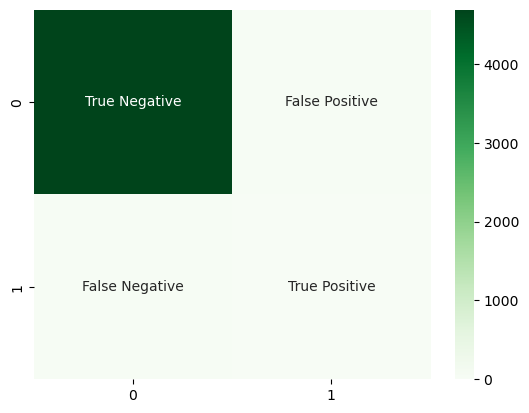

In [4]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Read in the data
data = pd.read_csv('updated_data.csv')

# Separate features (X) and target variable (y)
X = data.drop(['YES/NO'], axis=1)  # Everything but the YES/NO
y = data['YES/NO']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Encode categorical data
le = LabelEncoder()
X_train['FLORIDA CITY'] = le.fit_transform(X_train['FLORIDA CITY'])
X_test['FLORIDA CITY'] = le.transform(X_test['FLORIDA CITY'])

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

# Print accuracy and visualize the confusion matrix
print(f"Accuracy: {accuracy:.2%}")
print("\nVisualization of the Confusion Matrix:")
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(matrix, annot=labels, fmt='', cmap="Greens")

In [5]:
https://www.youtube.com/watch?v=PHxYNGo8NcI
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.00-Visualization-and-Plotting.html
ChatGPT 3.5

SyntaxError: invalid syntax (328951609.py, line 1)

Enter the first Florida City: Gainesville
Do you want to enter a second Florida City? (YES/NO): YES
Enter the second Florida City: Jacksonville
Enter Year: 2030
Enter Day: 1
Enter Month: 1

For Gainesville, it is not likely for there to be a natural disaster.


For Jacksonville, it is not likely for there to be a natural disaster.

The mean precipitation for City 1: 0.0796969696969697
The mean precipitation for City 2: 0.0661111111111111
Difference in Mean precipitation: 0.01358585858585859

The mean mean temp for City 1: 71.28848484848484
The mean mean temp for City 2: 72.445
Difference in Mean mean temp: 1.1565151515151513



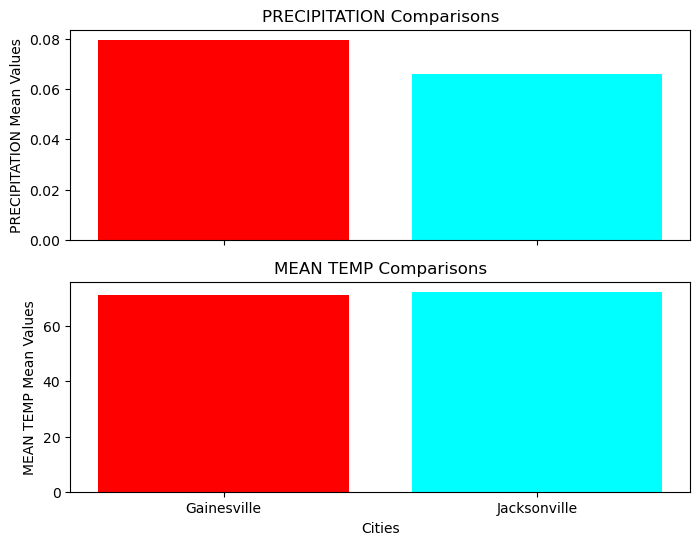

In [7]:
import matplotlib.pyplot as plt

def city_input(inputted):  # Function that searches to check if the Florida city is valid
    while True:
        user_entered_city = input(inputted).title()
        valid_cities = [city.title() for city in florida_cities]
        if user_entered_city in valid_cities:
            return user_entered_city
        else:
            print("Invalid Florida City.")

user_entered_city1 = city_input("Enter the first Florida City: ")

enter_second_city = input("Do you want to enter a second Florida City? (YES/NO): ").upper()

if enter_second_city == 'YES':
    user_entered_city2 = city_input("Enter the second Florida City: ")
else:
    user_entered_city2 = None  # sets

while True:
    try:
        user_entered_year = int(input("Enter Year: "))
        if not (1970 <= user_entered_year <= 3000):
            raise ValueError("Year must be a valid year")
        break
    except ValueError:
        print("Enter a valid number for the Year.")

while True:
    try:
        user_entered_day = int(input("Enter Day: "))
        if not (1 <= user_entered_day <= 31):
            raise ValueError("Day must be a number between 1 and 31.")
        break
    except ValueError:
        print("Enter a valid integer between 1 and 31.")

while True:
    try:
        user_entered_month = int(input("Enter Month: "))
        if not (1 <= user_entered_month <= 12):
            raise ValueError("Month must be a number between 1 and 12.")
        break
    except ValueError:
        print("Enter a valid integer between 1 and 12.")

# Data frame based on what the user entered
user_input1 = pd.DataFrame({
    'YEAR': [user_entered_year],
    'MONTH': [user_entered_month],
    'DAY': [user_entered_day],
    'FLORIDA CITY': [user_entered_city1],
})

# Changes the values back from string so the machine can understand them
florida_city_variable = user_input1['FLORIDA CITY'].iloc[0]  # Integer-location based indexing for selection by position
transformed_values = le.transform([florida_city_variable])
user_input1['FLORIDA CITY'] = transformed_values

for user_input in [user_input1]:  # There has to be the first user input
    missing_columns = set(X_train.columns) - set(user_input.columns)  # The user does not enter the extra information
    for col in missing_columns:
        if col in X_train.columns:
            if col == 'PRECIPITATION' or col == 'MEAN TEMP':
                # Use the entered Florida city to get average values for that city and put it into the data frame
                user_input[col] = X_train[X_train['FLORIDA CITY'] == user_input['FLORIDA CITY'].values[0]][col].mean()
            else:
                user_input[col] = X_train[col].mode().iloc[0]

# Columns are made sure to be put in the same order for debugging
user_input1 = user_input1[X_train.columns]

if user_entered_city2:  # Goes to this only if the user selects "YES" for inputting a second city
    user_input2 = pd.DataFrame({
        'YEAR': [user_entered_year],
        'MONTH': [user_entered_month],
        'DAY': [user_entered_day],
        'FLORIDA CITY': [user_entered_city2],
    })

    florida_city_variable = user_input2['FLORIDA CITY'].iloc[0]  # Changes it back for the machine to be able to read, since it cannot understand a string
    transformed_values = le.transform([florida_city_variable])
    user_input2['FLORIDA CITY'] = transformed_values

    for user_input in [user_input2]:  # You can extend this for additional user inputs
        missing_columns = set(X_train.columns) - set(user_input.columns)
        for col in missing_columns:
            if col in X_train.columns:
                if col == 'PRECIPITATION' or col == 'MEAN TEMP':
                    # Use the entered Florida city to get average values for that city
                    user_input[col] = X_train[X_train['FLORIDA CITY'] == user_input['FLORIDA CITY'].values[0]][col].mean()
                else:
                    user_input[col] = X_train[col].mode().iloc[0]

    # Columns are made sure to be put in the same order for debugging
    user_input2 = user_input2[X_train.columns]

else:
    user_input2 = None  # Set to None if the user doesn't want to enter the second city

prediction1 = clf.predict(user_input1)  # Uses the Decision Tree to predict
if 'YES' in prediction1:
    print(f"For {user_entered_city1}, it is likely for there to be a natural disaster.\n")
else:
    print(f"\nFor {user_entered_city1}, it is not likely for there to be a natural disaster.\n")

risky1 = "Risk: Likely" if 'YES' in prediction1 else "Risk: Unlikely"  # Used for the icons on the map

if user_input2 is not None:
    prediction2 = clf.predict(user_input2)  # Uses the Decision Tree to predict
    if 'YES' in prediction2:
        print(f"For {user_entered_city2}, it is likely for there to be a natural disaster.\n")
    else:
        print(f"\nFor {user_entered_city2}, it is not likely for there to be a natural disaster.\n")

    risky2 = "Risk: Likely" if 'YES' in prediction2 else "Risk: Unlikely"  # Used for the icons on the map

    weather_features = ['PRECIPITATION', 'MEAN TEMP']  # Can add more features or change if wanted

    for feature in weather_features:
        mean_value_city_1 = user_input1[feature].values[0]
        mean_value_city_2 = user_input2[feature].values[0]

        # Prints out the mean of each city and the difference of them
        print(f"The mean {feature.lower()} for City 1: {mean_value_city_1}")  # Prints out the feature and mean value
        print(f"The mean {feature.lower()} for City 2: {mean_value_city_2}")
        print(f"Difference in Mean {feature.lower()}: {abs(mean_value_city_1 - mean_value_city_2)}\n")

    fig, axes = plt.subplots(nrows=len(weather_features), ncols=1, figsize=(8, 6), sharex=True)  # Shares the axes

    for i, feature in enumerate(weather_features):  # Can add more features to the features if needed because it loops through
        mean_value_city_1 = user_input1[feature].values[0]
        mean_value_city_2 = user_input2[feature].values[0]

        # Plots the bar chart
        axes[i].bar([user_entered_city1, user_entered_city2], [mean_value_city_1, mean_value_city_2], color=['red', 'cyan'])
        axes[i].set_ylabel(f'{feature} Mean Values')
        axes[i].set_title(f'{feature} Comparisons')

    plt.xlabel('Cities')  # Labels the x-axis
    plt.show()

https://www.youtube.com/watch?v=g4rY-dGkBw8

In [8]:
# Latitude/longitude for Mapping
from geopy.geocoders import ArcGIS

nom = ArcGIS()
location1 = nom.geocode(f"{user_entered_city1}, Florida")

if location1:
    latitude1 = location1.latitude
    longitude1 = location1.longitude
    # print(f"Latitude: {latitude1}, Longitude: {longitude1}")
elif not location1:
    print(f"{user_entered_city1} was not found!")

if user_entered_city2:
    nom2 = ArcGIS()
    location2 = nom2.geocode(f"{user_entered_city2}, Florida")

    if location2:
        latitude2 = location2.latitude
        longitude2 = location2.longitude
        # print(f"Latitude: {latitude2}, Longitude: {longitude2}")
    elif not location2:
        print(f"{user_entered_city2} was not found!")

In [9]:
# Map
import folium
from folium import plugins

# Map that is centered in the middle of Florida
florida_map = folium.Map(location=[27.9944, -81.7602], zoom_start=7)

# Adds the marker to the map for the first city
folium.Marker(
    location=[latitude1, longitude1],
    popup=f'{user_entered_city1}\n{risky1}',  # Shows the name of the city
    icon=folium.Icon(color='red', icon="cloud")  # Distinct icon, with cloud
).add_to(florida_map)

# Adds the marker to the map for the second city if entered
if user_entered_city2:
    folium.Marker(
        location=[latitude2, longitude2],
        popup=f'{user_entered_city2}\n{risky2}',  # Shows the name of the city
        icon=folium.Icon(color='blue', icon="cloud")  # Distinct icon, with cloud
    ).add_to(florida_map)

florida_map

<IPython.core.display.Javascript object>


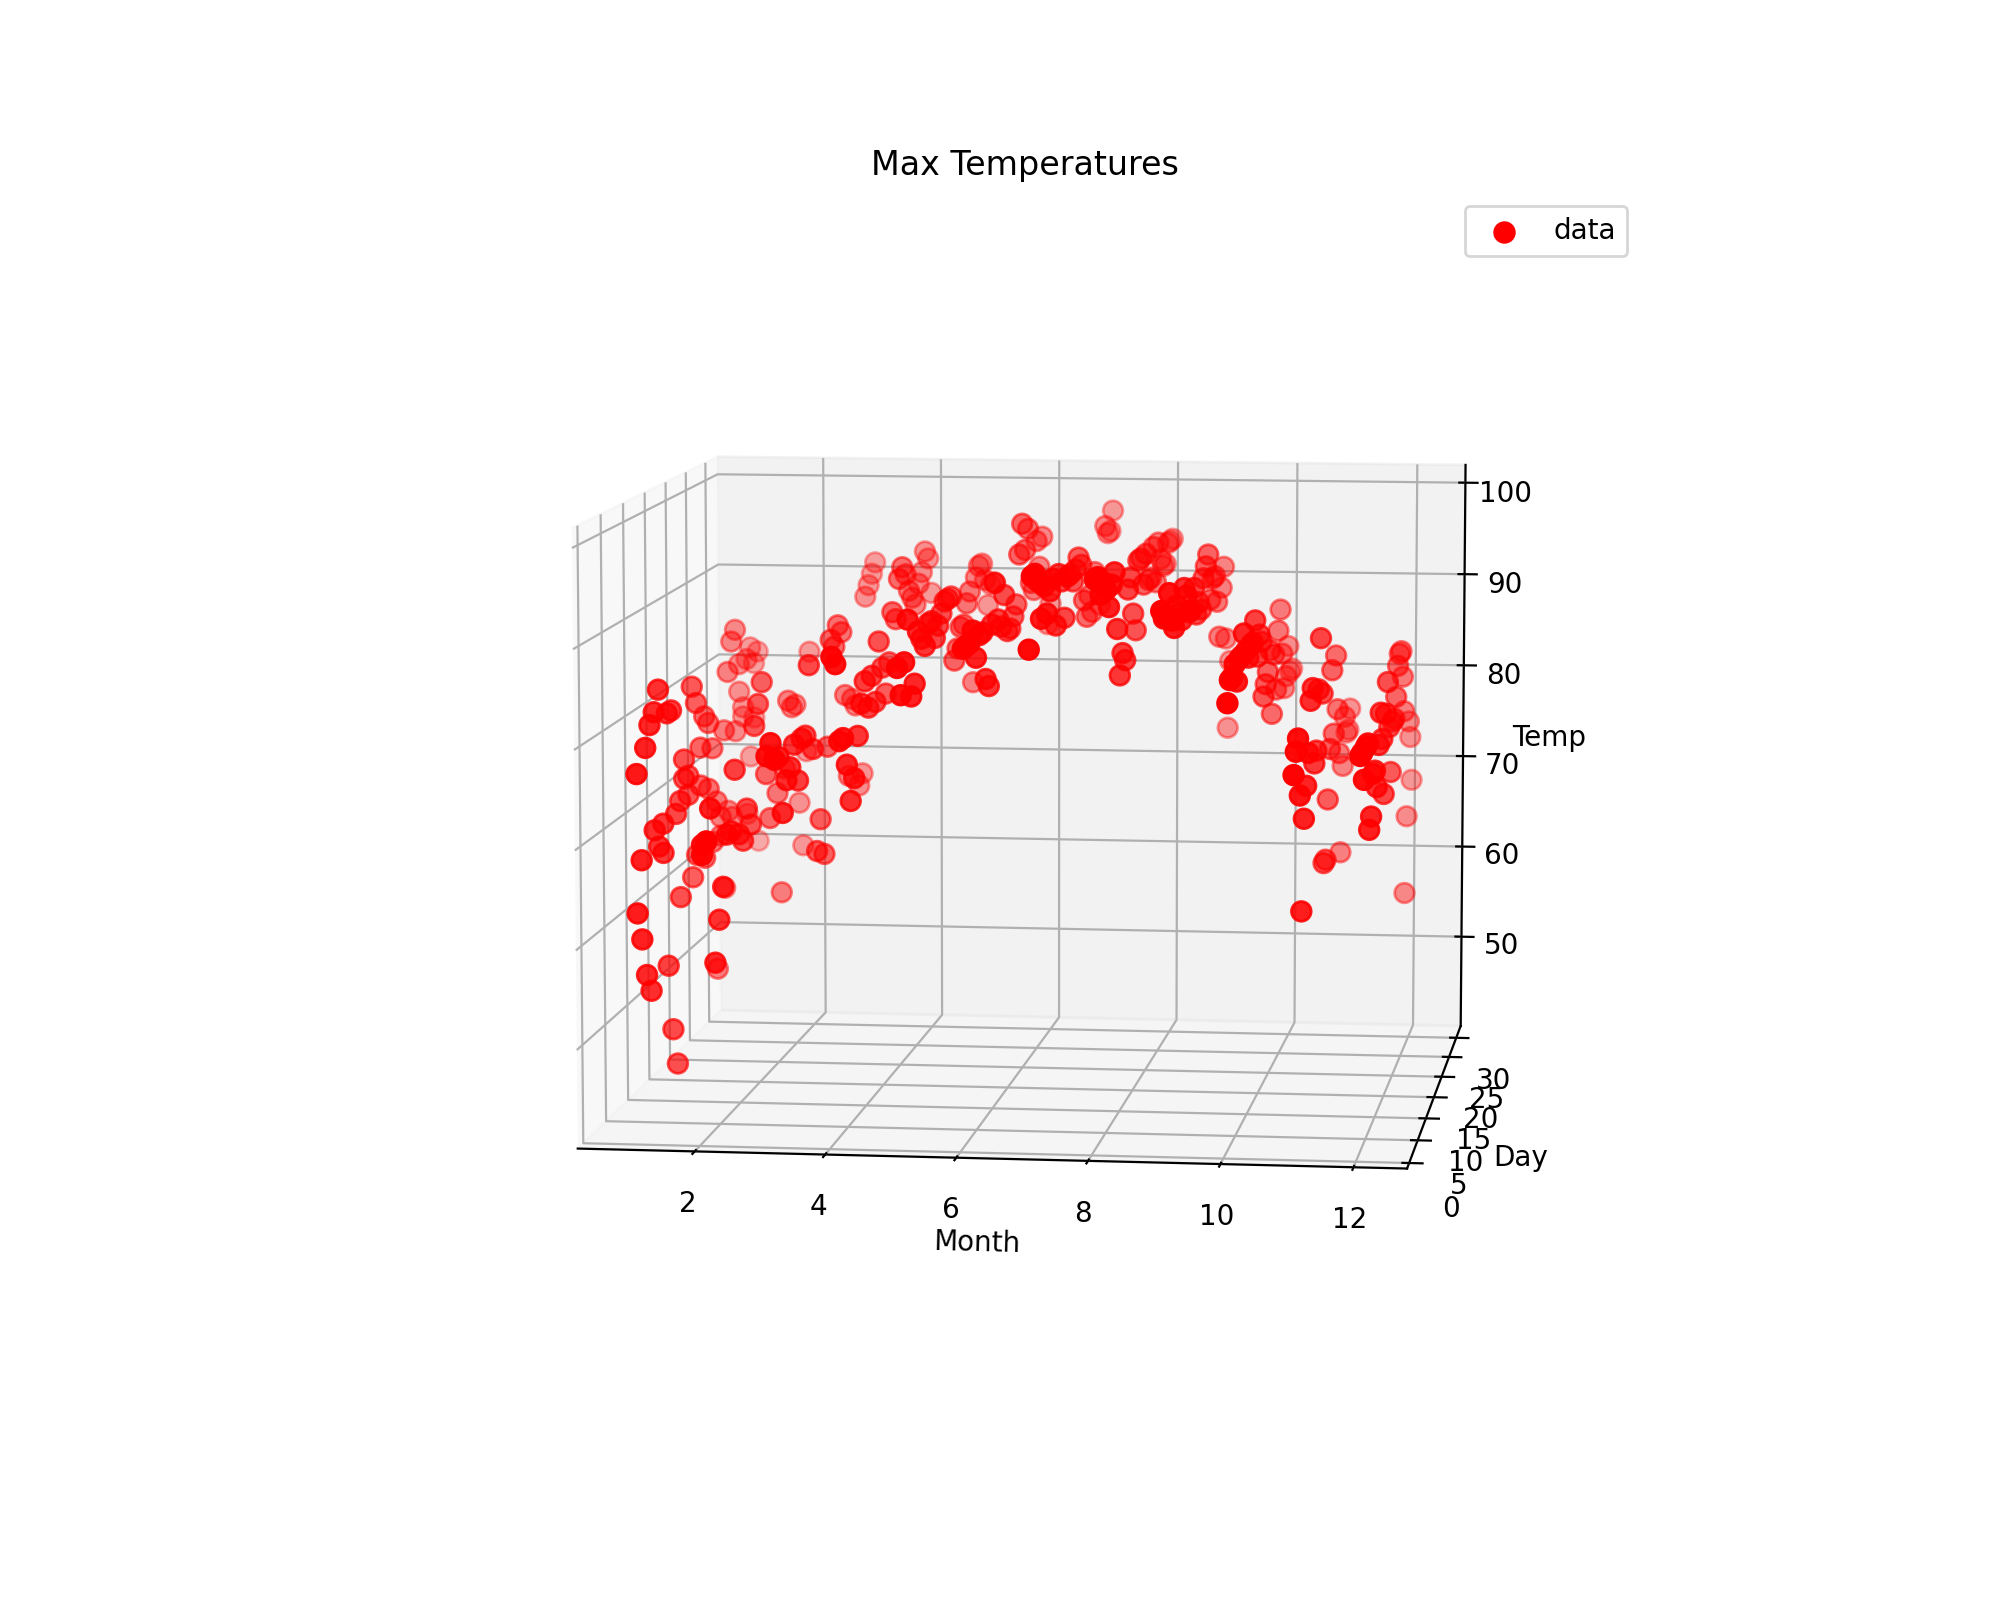

<IPython.core.display.Javascript object>


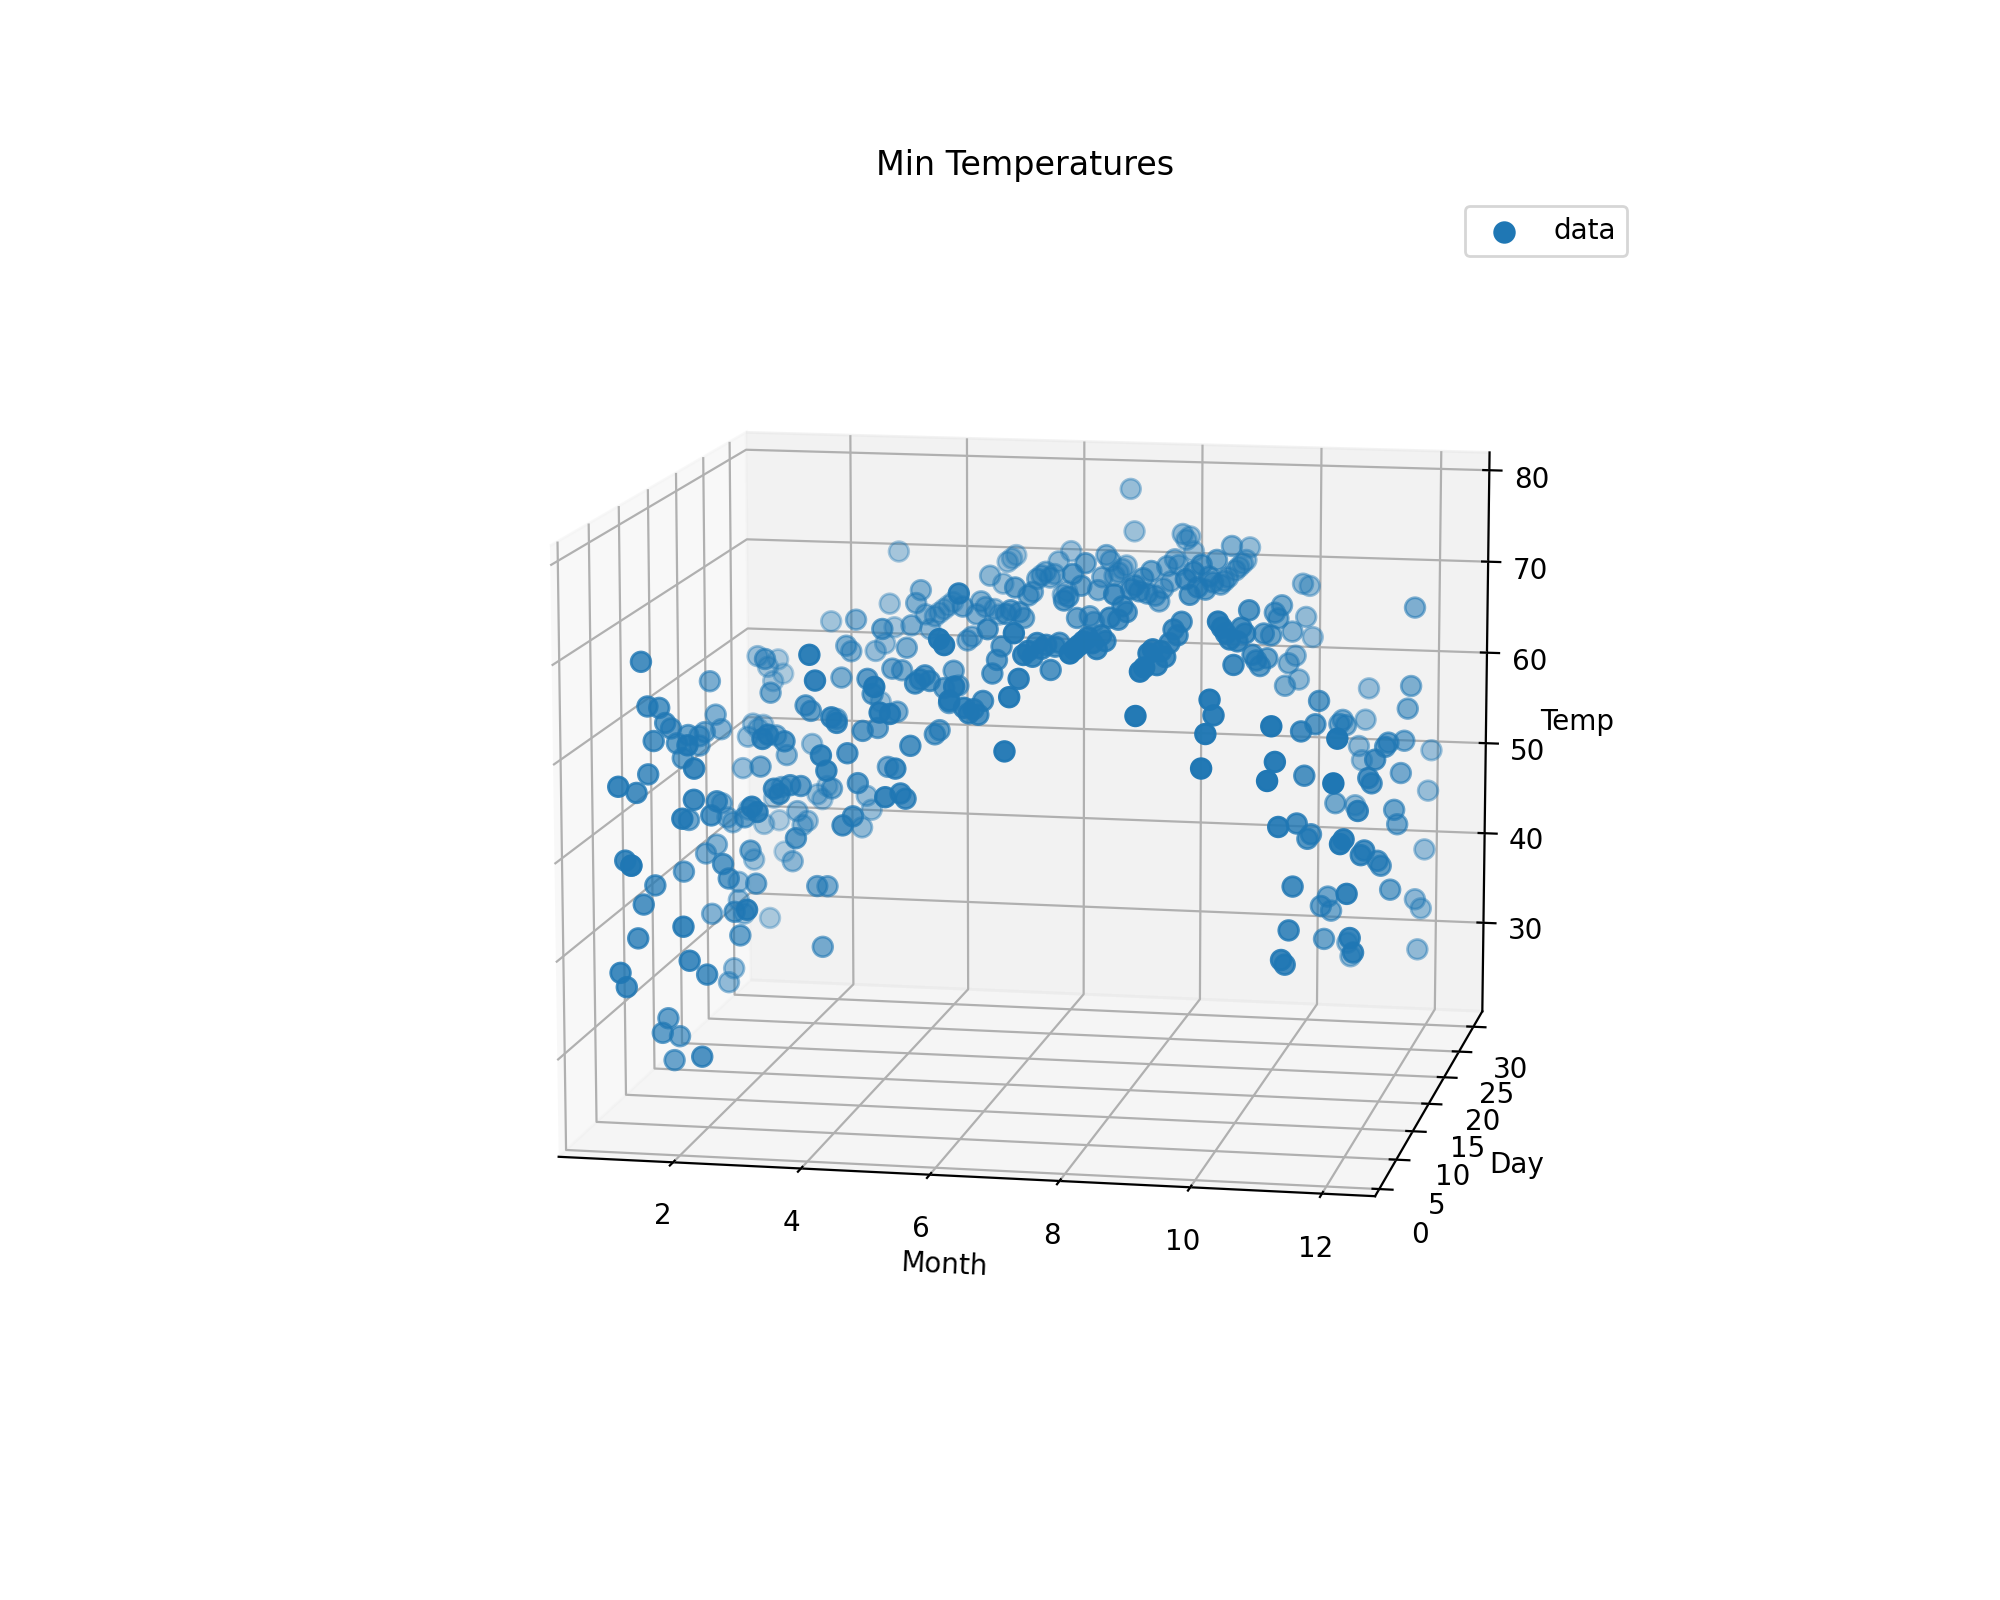

<IPython.core.display.Javascript object>


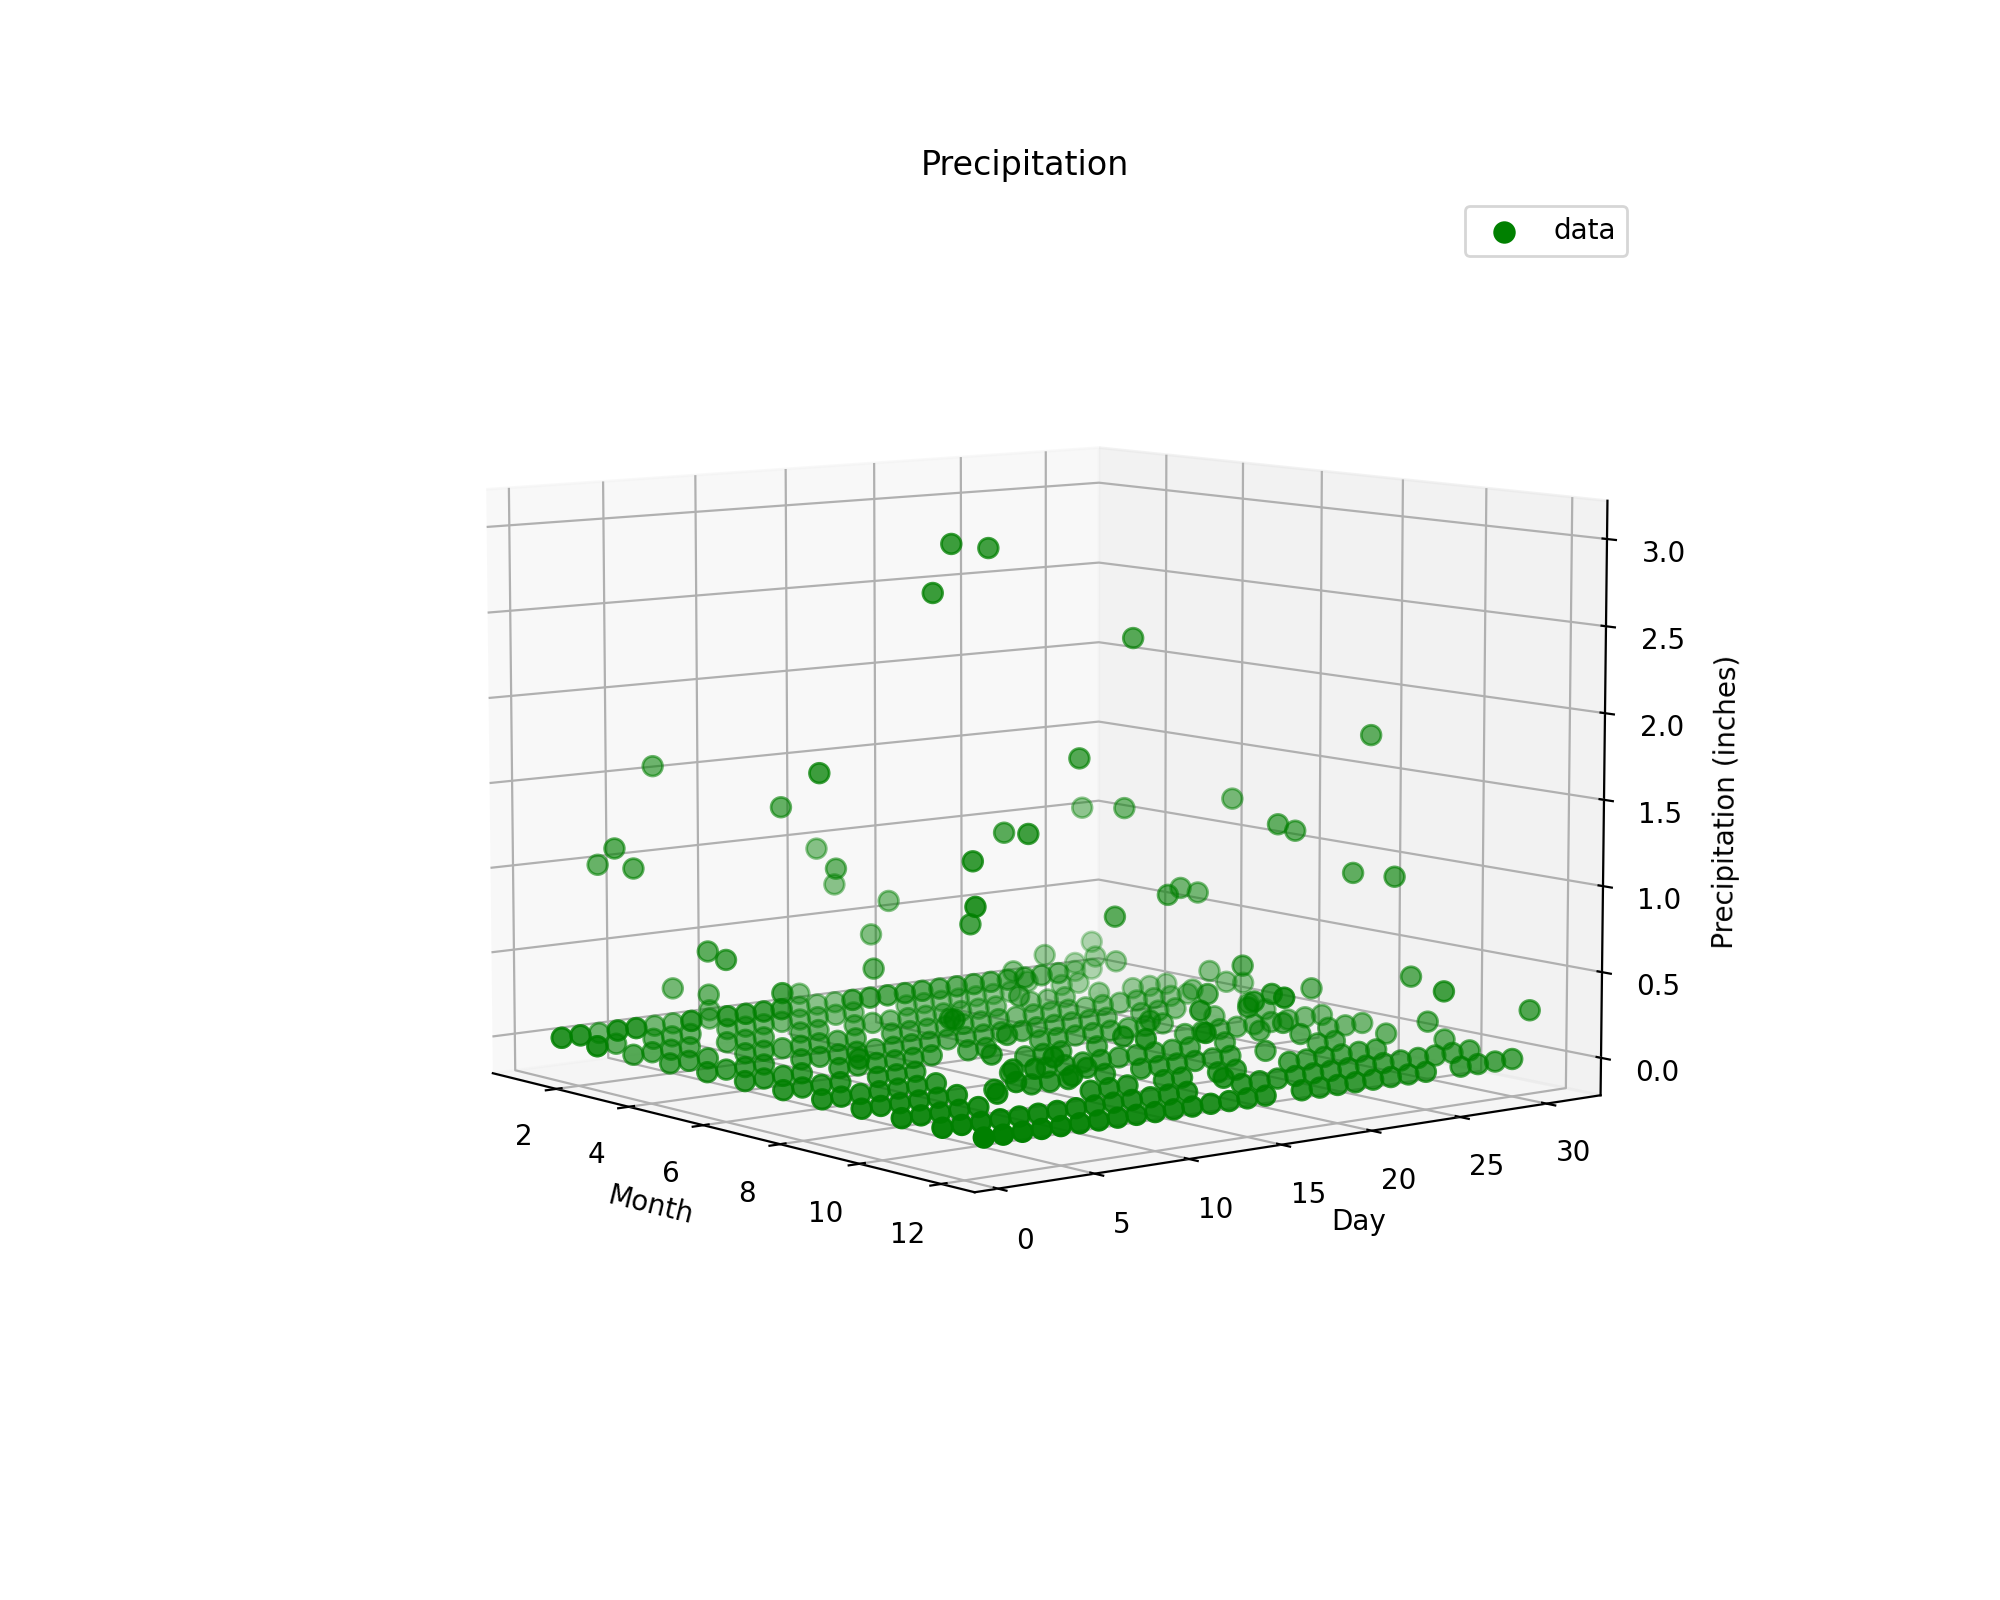

In [10]:
# Graphs 
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Maximum Temperature
data = np.genfromtxt('updated_data.csv', delimiter=',')

x_data = data[:, 1] # Month
y_data = data[:, 2] # Day
z_data = data[:, 4] # Max Temp

# Limits the number of data points so data can be visualized 
x_subset = x_data[:400]
y_subset = y_data[:400]
z_subset = z_data[:400]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D subplot

# Plotting the data points in 3D with subsets of data
ax.scatter(x_subset, y_subset, z_subset, label='data', s=50, c='r')

ax.set_title('Max Temperatures')
ax.set_xlabel('Month')
ax.set_ylabel('Day')
ax.set_zlabel('Temp')
ax.legend()

plt.show()

# Minimum Temperature
data = np.genfromtxt('updated_data.csv', delimiter=',')

x_data = data[:, 1]
y_data = data[:, 2]
z_data = data[:, 5] # Min Temp

# Limits the number of data points so data can be visualized 
x_subset = x_data[:400]
y_subset = y_data[:400]
z_subset = z_data[:400]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D subplot

# Plotting the data points in 3D with subsets of data
ax.scatter(x_subset, y_subset, z_subset, label='data', s=50)

ax.set_title('Min Temperatures')
ax.set_xlabel('Month')
ax.set_ylabel('Day')
ax.set_zlabel('Temp')
ax.legend()

plt.show()

# Precipitation 
data = np.genfromtxt('updated_data.csv', delimiter=',')

x_data = data[:, 1]
y_data = data[:, 2]
z_data = data[:, 3] #Precip

# Limits the number of data points so data can be visualized 
x_subset = x_data[:400]
y_subset = y_data[:400]
z_subset = z_data[:400]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D subplot

# Plotting the data points in 3D with subsets of data
ax.scatter(x_subset, y_subset, z_subset, label='data', s=50, c='g')

ax.set_title('Precipitation')
ax.set_xlabel('Month')
ax.set_ylabel('Day')
ax.set_zlabel('Precipitation (inches)')
ax.legend()

plt.show()

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.00-Visualization-and-Plotting.html 